<a href="https://colab.research.google.com/github/vidisha02/SOC_GPT/blob/main/week2_22b1218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words=open('names.txt','r').read().splitlines()


In [ ]:
len(words)


32033

In [ ]:
words[:15]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella']

In [ ]:
min(len(w) for w in words)

2

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
blocksize=2
def build_dataset(words):

    X,Y=[],[]
    for w in words:
    # print(w)
        context=[0]* blocksize
        for ch in w+'.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context=context[1:]+[ix]

    X=torch.tensor(X)
    Y=torch.tensor(Y)
    return X,Y


In [ ]:
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

In [ ]:
C=torch.randn((27,10))
C[X]
C[X].shape

torch.Size([228146, 2, 10])

In [ ]:
X
X.shape

torch.Size([228146, 2])

In [ ]:
X

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        ...,
        [26, 25],
        [25, 26],
        [26, 24]])

In [ ]:
C

tensor([[-0.7740,  2.8945,  0.9405,  0.9382, -1.3504,  0.2284,  0.4770, -1.5228,
          0.7331,  0.4975],
        [-0.2777, -0.0777, -0.5055,  0.0418, -1.3941,  0.5005, -1.7745,  1.2771,
          0.5301,  0.8694],
        [ 0.0655, -0.6850,  1.3549,  1.5795,  1.0221, -0.5866,  1.4247, -0.6919,
          0.2358, -0.4973],
        [ 0.8061,  0.7862,  0.8620,  1.4459,  0.6151, -0.1730, -1.4537,  0.4199,
          0.9941, -0.8854],
        [-1.4065, -0.5612, -0.0081, -2.0311, -2.1057,  0.4787,  0.0657,  0.2041,
          0.2880, -1.3919],
        [ 0.1774, -0.7449, -0.9709,  0.0072,  0.1852,  1.3098,  1.1173, -1.5540,
          0.5837, -1.9508],
        [-0.1104, -0.3382,  0.1406, -0.2474,  1.6696,  0.2486, -0.9526, -0.6460,
         -0.5773,  0.2091],
        [ 2.0234, -1.3302,  1.6833, -0.4574,  2.6783, -1.3877, -0.6305,  0.8871,
          1.0633, -1.1969],
        [ 0.5725,  1.0709, -0.7082,  0.1613, -1.7900, -1.4347,  0.3225, -0.1201,
          0.3406,  0.2670],
        [ 0.0578,  

In [ ]:
C[X]

tensor([[[-0.7740,  2.8945,  0.9405,  ..., -1.5228,  0.7331,  0.4975],
         [-0.7740,  2.8945,  0.9405,  ..., -1.5228,  0.7331,  0.4975]],

        [[-0.7740,  2.8945,  0.9405,  ..., -1.5228,  0.7331,  0.4975],
         [ 0.1774, -0.7449, -0.9709,  ..., -1.5540,  0.5837, -1.9508]],

        [[ 0.1774, -0.7449, -0.9709,  ..., -1.5540,  0.5837, -1.9508],
         [-0.9601,  0.7599, -0.4888,  ..., -0.7426,  0.6897,  0.3944]],

        ...,

        [[-1.3488,  1.2536, -1.2674,  ...,  1.1424,  1.2955, -1.4752],
         [ 1.0876,  0.1299,  0.6697,  ...,  0.8371, -1.7591,  1.4354]],

        [[ 1.0876,  0.1299,  0.6697,  ...,  0.8371, -1.7591,  1.4354],
         [-1.3488,  1.2536, -1.2674,  ...,  1.1424,  1.2955, -1.4752]],

        [[-1.3488,  1.2536, -1.2674,  ...,  1.1424,  1.2955, -1.4752],
         [ 0.2311,  0.8151,  0.5593,  ..., -0.0330,  0.3340, -0.4319]]])

In [ ]:
emb=C[X]

In [ ]:
W1=torch.randn(20,200)
b1=torch.randn(200)
h=torch.tanh(emb.view(-1,20)@W1+b1)


In [ ]:
h.shape

torch.Size([228146, 200])

In [ ]:
W2=torch.randn(200,27)
b2=torch.randn(27)
logits=h@W2+b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
counts=logits.exp()
probs=counts/counts.sum(1,keepdim=True)

In [ ]:
probs.shape

torch.Size([228146, 27])

In [ ]:
loss=-probs[torch.arange(probs.shape[0]),Y].log().mean()

In [ ]:
loss

tensor(26.1394)

In [ ]:
parameters=[C,W1,b1,W2,b2]


In [ ]:
sum(p.nelement()for p in parameters)

9897

In [ ]:
for p in parameters:
  p.requires_grad=True

In [ ]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lri=[]
lossi=[]
stepi=[]

In [ ]:

for i in range(200000):
  ix=torch.randint(0,Xtr.shape[0],(40,))
  emb=C[Xtr[ix]]
  h=torch.tanh(emb.view(-1,20)@W1+b1)
  logits=torch.matmul(h,W2)+b2
  probs=torch.softmax(logits,dim=1)
  loss=-probs[torch.arange(probs.shape[0]),Ytr[ix]].log().mean()
  #print(loss.item())
  for p in parameters:
    p.grad=None
  loss.backward()
  #lr=lrs[i]
  lr=0.1 if i<100000 else 0.01
  for p in parameters:
    p.data+= -lr*p.grad

  stepi.append(i)
  #lri.append(lr)
  lossi.append(loss.log10().item())
print(loss.item())

2.5615458488464355


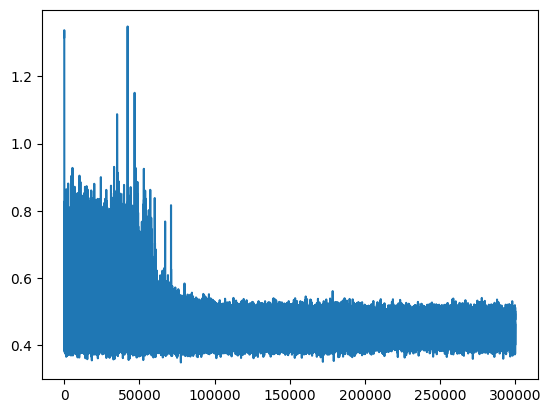

In [ ]:
plt.plot(stepi,lossi)

In [ ]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,20)@W1+b1)
logits=h@W2+b2
loss=F.cross_entropy(logits,Ytr)
loss

NameError: name 'C' is not defined

In [ ]:
emb=C[Xdev]
h=torch.tanh(emb.view(-1,20)@W1+b1)
logits=h@W2+b2
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.8325, grad_fn=<NllLossBackward0>)

In [ ]:
emb=C[Xte]
h=torch.tanh(emb.view(-1,20)@W1+b1)
logits=h@W2+b2
loss=F.cross_entropy(logits,Yte)
loss

tensor(2.8260, grad_fn=<NllLossBackward0>)

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
  out=[]
  context=[0]*blocksize
  while True:
    emb=C[torch.tensor([context])]
    h=torch.tanh(emb.view(1,-1)@ W1+b1)
    logits=h@ W2+b2
    probs=F.softmax(logits,dim=1)
    ix=torch.multinomial(probs,num_samples=1,generator=g).item()
    context=context[1:]+[ix]
    out.append(ix)
    if ix==0:
      break
  print(''.join(itos[i]) for i in out)

<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4b30>
<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4ba0>
<generator object <genexpr> at 0x7de568fb4b30>
<generator object <genexpr> at 0x7de568fb4ba0>
